In [73]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

crimes_dict = {0: 'BATTERY', 1: 'THEFT', 2: 'CRIMINAL DAMAGE', 3: 'DECEPTIVE PRACTICE', 4: 'ASSAULT'}

DATA_PATH = r"Data/Dataset_crimes.csv"

In [7]:
df = pd.read_csv(DATA_PATH, index_col=0)

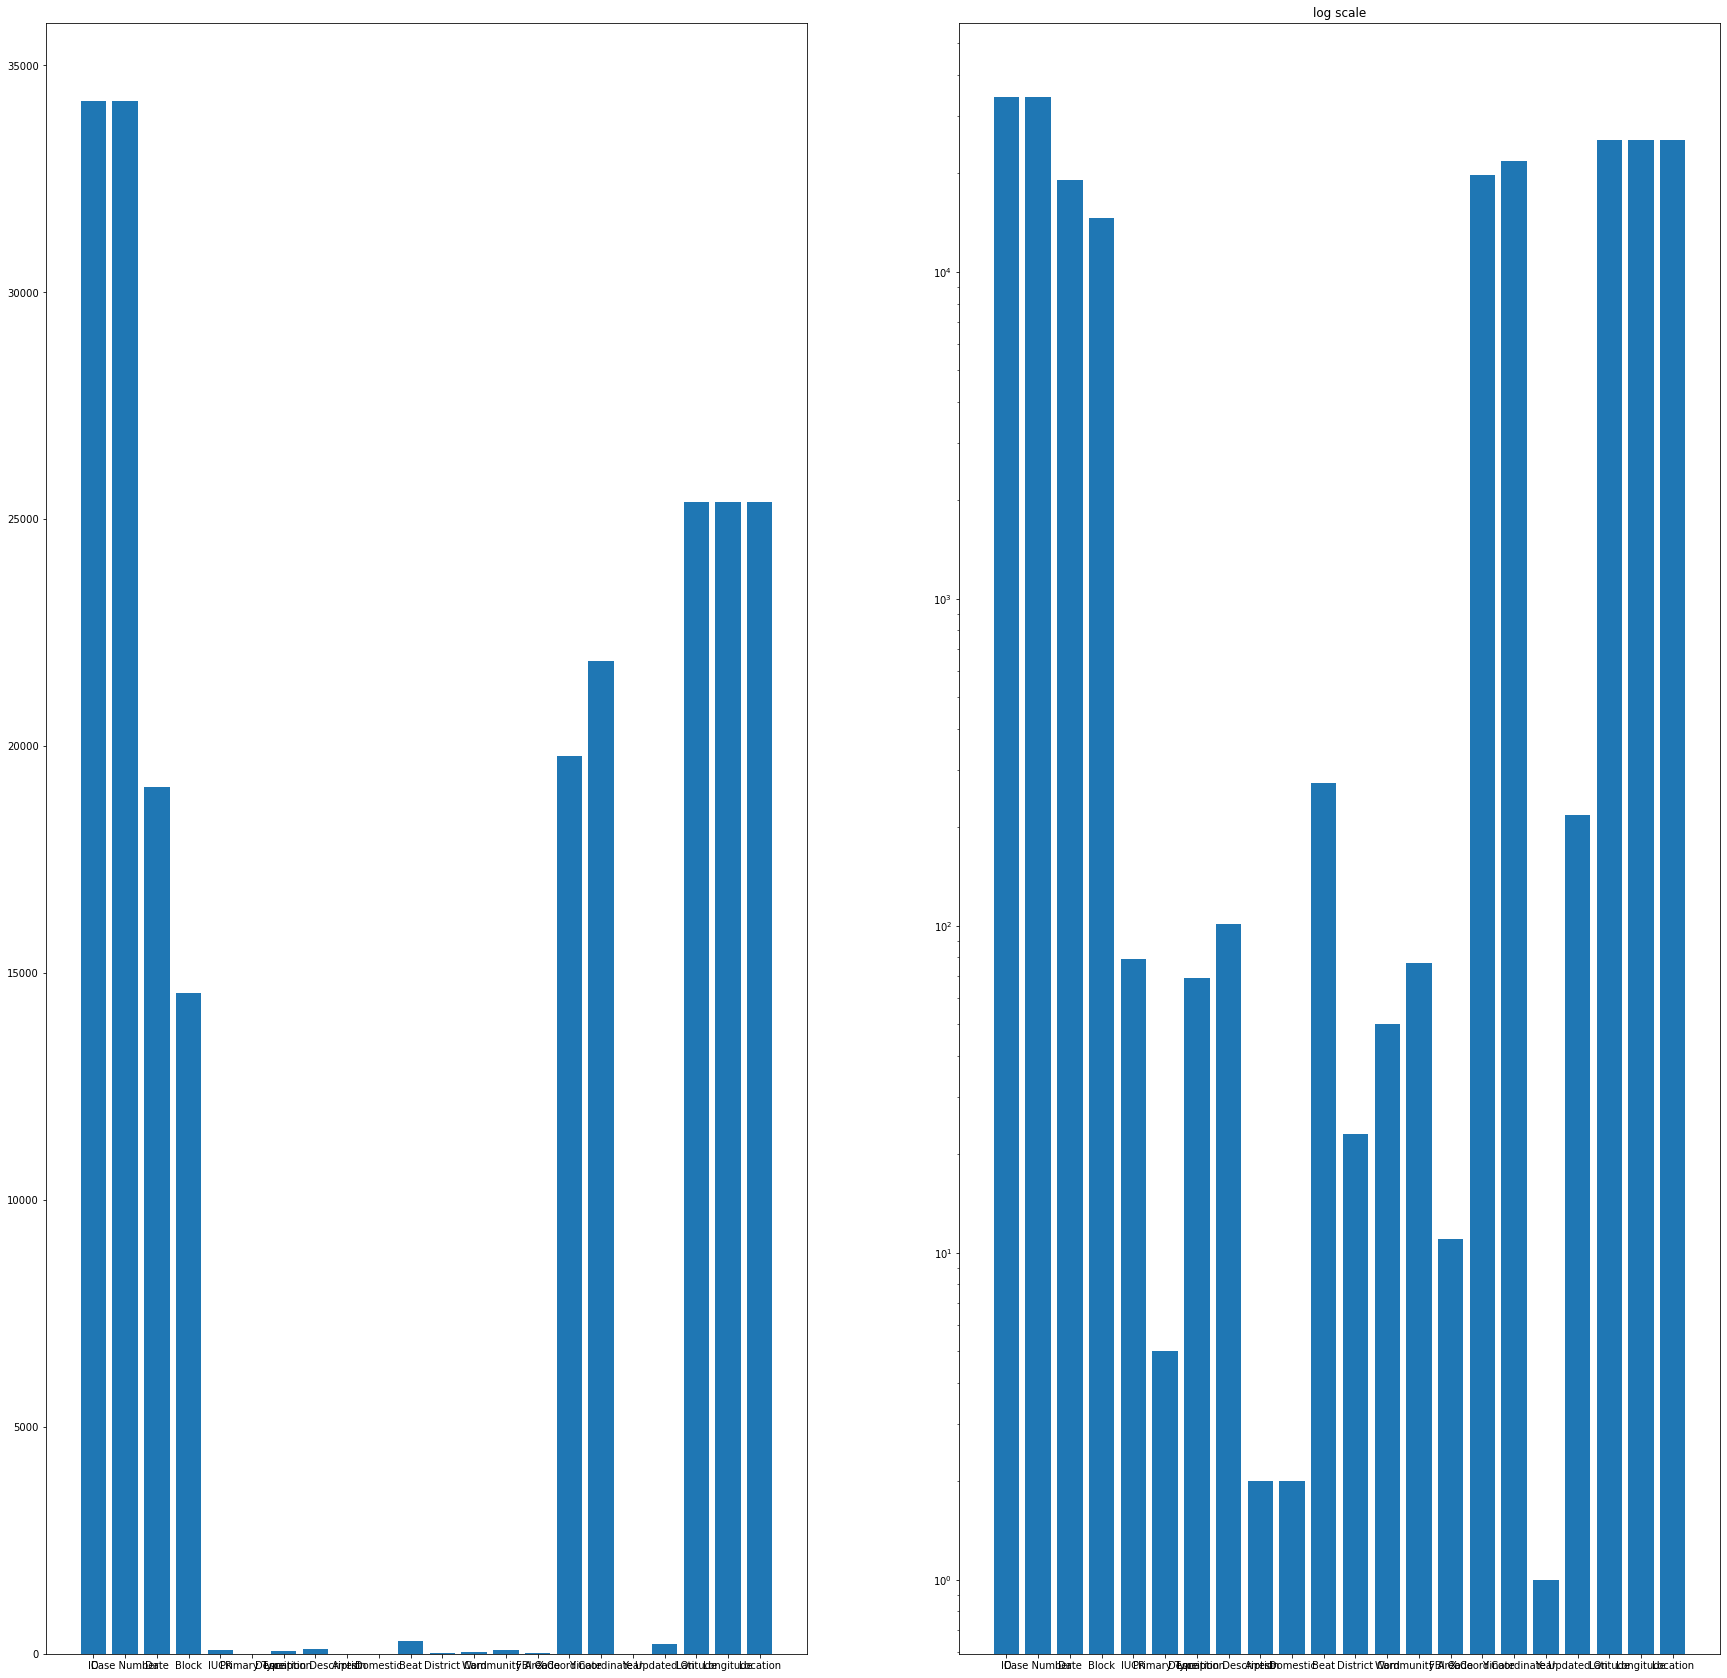

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
count_uniqes = df.apply(lambda col: col.nunique())
axs[0].bar(list(df.columns.values), count_uniqes)
axs[1].set_title("linear scale")
axs[1].bar(list(df.columns.values), count_uniqes)
axs[1].set_yscale('log')
axs[1].set_title("log scale")
plt.show()

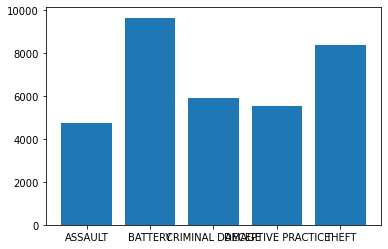

In [141]:
df_count_crimes = df.groupby(["Primary Type"]).size().reset_index(name="Count")
plt.bar(df_count_crimes["Primary Type"], df_count_crimes["Count"])
plt.show()

In [157]:
plt.figure(figsize=(30, 30))
df_count_crimes = df.groupby(["Location Description"]).size().reset_index(name="Count")
df_count_crimes = df_count_crimes[df_count_crimes["Count"] > 300]
df_count_crimes = df_count_crimes.sort_values(by="Count")
print(df_count_crimes["Location Description"])


import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

go.Figure(go.Scatter(x=df_count_crimes["Location Description"], y=df_count_crimes["Count"])).show()


81           RESIDENCE - YARD (FRONT / BACK)
56                               GAS STATION
99                    VEHICLE NON-COMMERCIAL
58                        GROCERY FOOD STORE
70                           OTHER (SPECIFY)
82                                RESTAURANT
36              COMMERCIAL / BUSINESS OFFICE
13                                     ALLEY
49                          DEPARTMENT STORE
80               RESIDENCE - PORCH / HALLWAY
88                        SMALL RETAIL STORE
74    PARKING LOT / GARAGE (NON RESIDENTIAL)
87                                  SIDEWALK
90                                    STREET
78                                 RESIDENCE
15                                 APARTMENT
Name: Location Description, dtype: object


<Figure size 2160x2160 with 0 Axes>

In [25]:
df_locations = df[['X Coordinate', 'Y Coordinate', 'Primary Type']]
df_locations.head()

,X Coordinate,Y Coordinate,Primary Type
0,1174496.0,1858251.0,BATTERY
1,1176011.0,1851718.0,THEFT
2,1138722.0,1900183.0,BATTERY
5,1194343.0,1834995.0,ASSAULT
6,1167677.0,1895707.0,THEFT


In [32]:
df_locations_sorted = df_locations.sort_values(by="X Coordinate")
df_locations_sorted["X Coordinate"].to_numpy()

array([1092706., 1094587., 1094780., ...,      nan,      nan,      nan])

In [43]:
colors = cm.rainbow(np.linspace(0, 1, 5))
cdict = {0: 'yellow', 1: 'red', 2: 'blue', 3: 'green', 4:'pink'}
COLORS = ['yellow', 'red', 'blue', 'green', 'pink']
cdict = {'BATTERY': 'yellow', 'THEFT': 'red', 'CRIMINAL DAMAGE' : 'blue', 'DECEPTIVE PRACTICE' : 'green', 'ASSAULT' : 'pink'}
PRIMARY_TYPE = ['BATTERY', 'THEFT', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'ASSAULT']

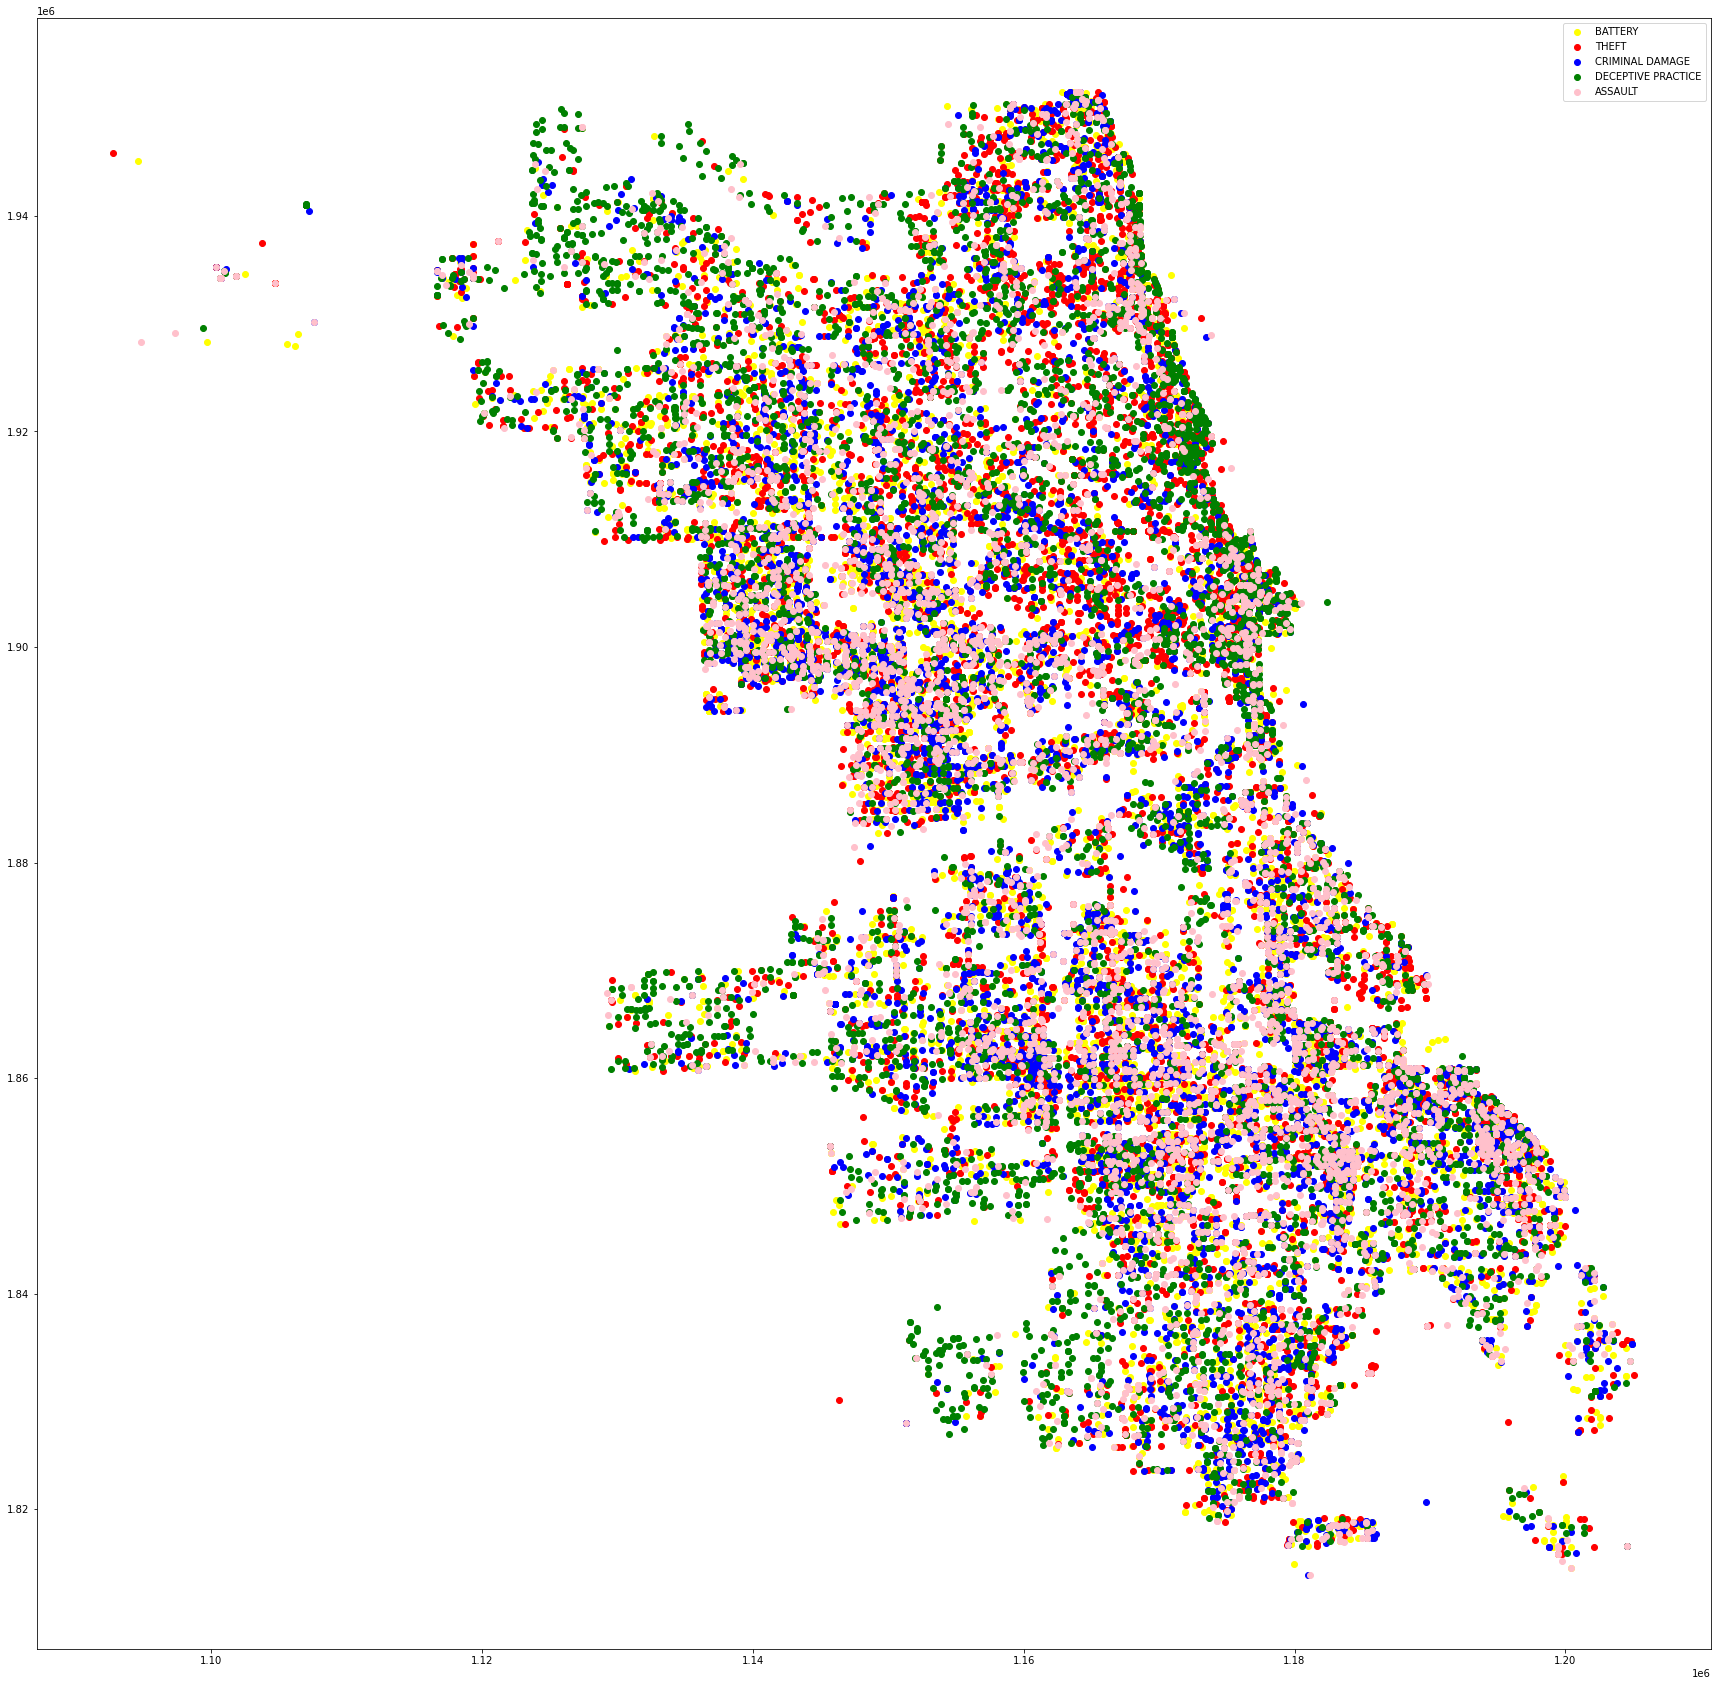

In [68]:
fig, ax = plt.subplots(figsize=(30, 30))
for pt,color in zip(PRIMARY_TYPE, COLORS):
    sub_df = df_locations_sorted[df_locations_sorted["Primary Type"] == pt]
    ax.scatter(sub_df["X Coordinate"].to_numpy(), sub_df["Y Coordinate"].to_numpy(), color=color, label=pt)
    ax.legend()
    
plt.show()

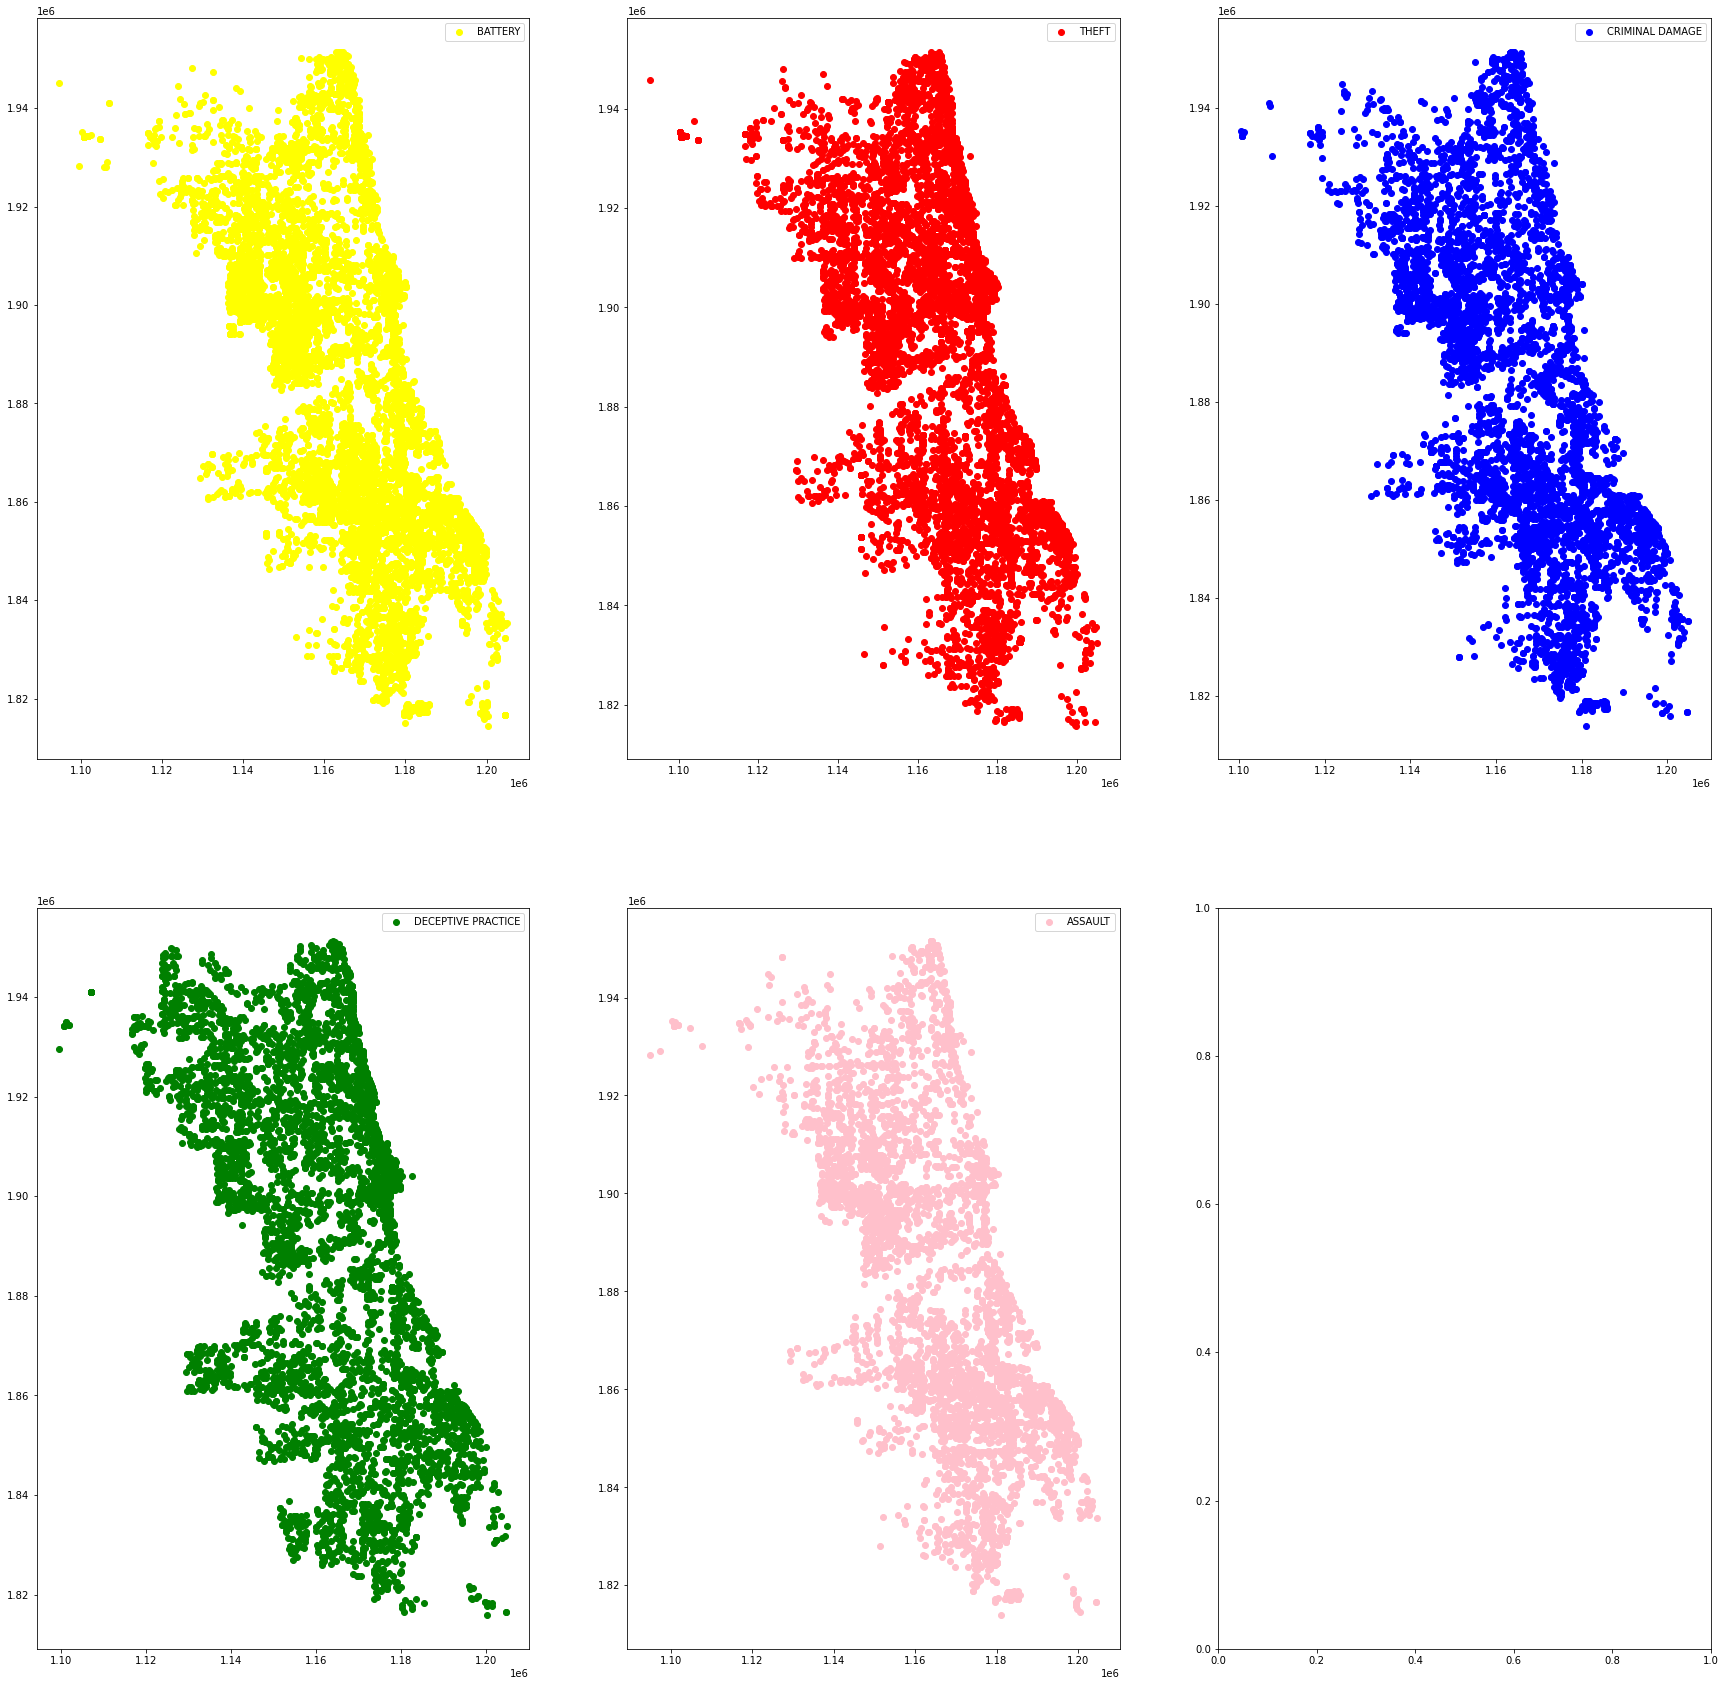

In [158]:
fig, axs = plt.subplots(2, 3, figsize=(30, 30))
for i,(pt,color) in enumerate((zip(PRIMARY_TYPE, COLORS))):
    plt_row = i // 3
    plt_col = i % 3
    sub_df = df_locations_sorted[df_locations_sorted["Primary Type"] == pt]
    axs[plt_row][plt_col].scatter(sub_df["X Coordinate"].to_numpy(), sub_df["Y Coordinate"].to_numpy(), color=color, label=pt)
    axs[plt_row][plt_col].legend()
    
plt.savefig(r"C:\Temp\chicago_plots.png")

In [139]:
df_locations_sorted = df_locations_sorted.dropna()
xx, yy = np.array([df_locations_sorted["X Coordinate"].to_numpy()]), np.array([df_locations_sorted["Y Coordinate"].to_numpy()])
xx = xx
yy = yy
print(xx.shape)
print(yy.shape)
X = np.concatenate((xx.T, yy.T), axis=1)
print(X)

(1, 33939)
(1, 33939)
[[1092706. 1945817.]
 [1094587. 1945065.]
 [1094780. 1928263.]
 ...
 [1204911. 1835285.]
 [1204911. 1835285.]
 [1205112. 1832435.]]


In [131]:
from sklearn.cluster import KMeans

ks = list(range(1, 21))
costs = [KMeans(n_clusters=k, init="random").fit(X).inertia_ for k in ks]

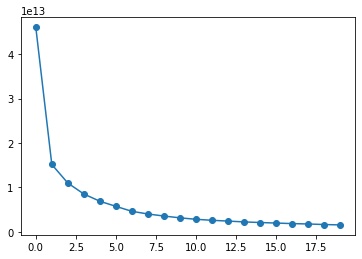

In [138]:
plt.plot(costs, '-', marker='o')